# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pr = pd.read_csv('previsao_de_renda.csv')
pr.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
pr.data_ref.unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
       '2016-01-01', '2016-02-01', '2016-03-01'], dtype=object)

In [4]:
#nao estava conseguindo fazer o countplot com as variaveis booleanas, entao alterei
pr['posse_de_veiculo'] = pr['posse_de_veiculo'].apply(lambda x: 'Sim' if x else 'Nao')
pr['posse_de_imovel'] = pr['posse_de_imovel'].apply(lambda x: 'Sim' if x else 'Nao')
pr.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,Nao,Sim,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,Sim,Sim,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,Sim,Sim,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,Sim,Nao,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,Nao,Nao,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


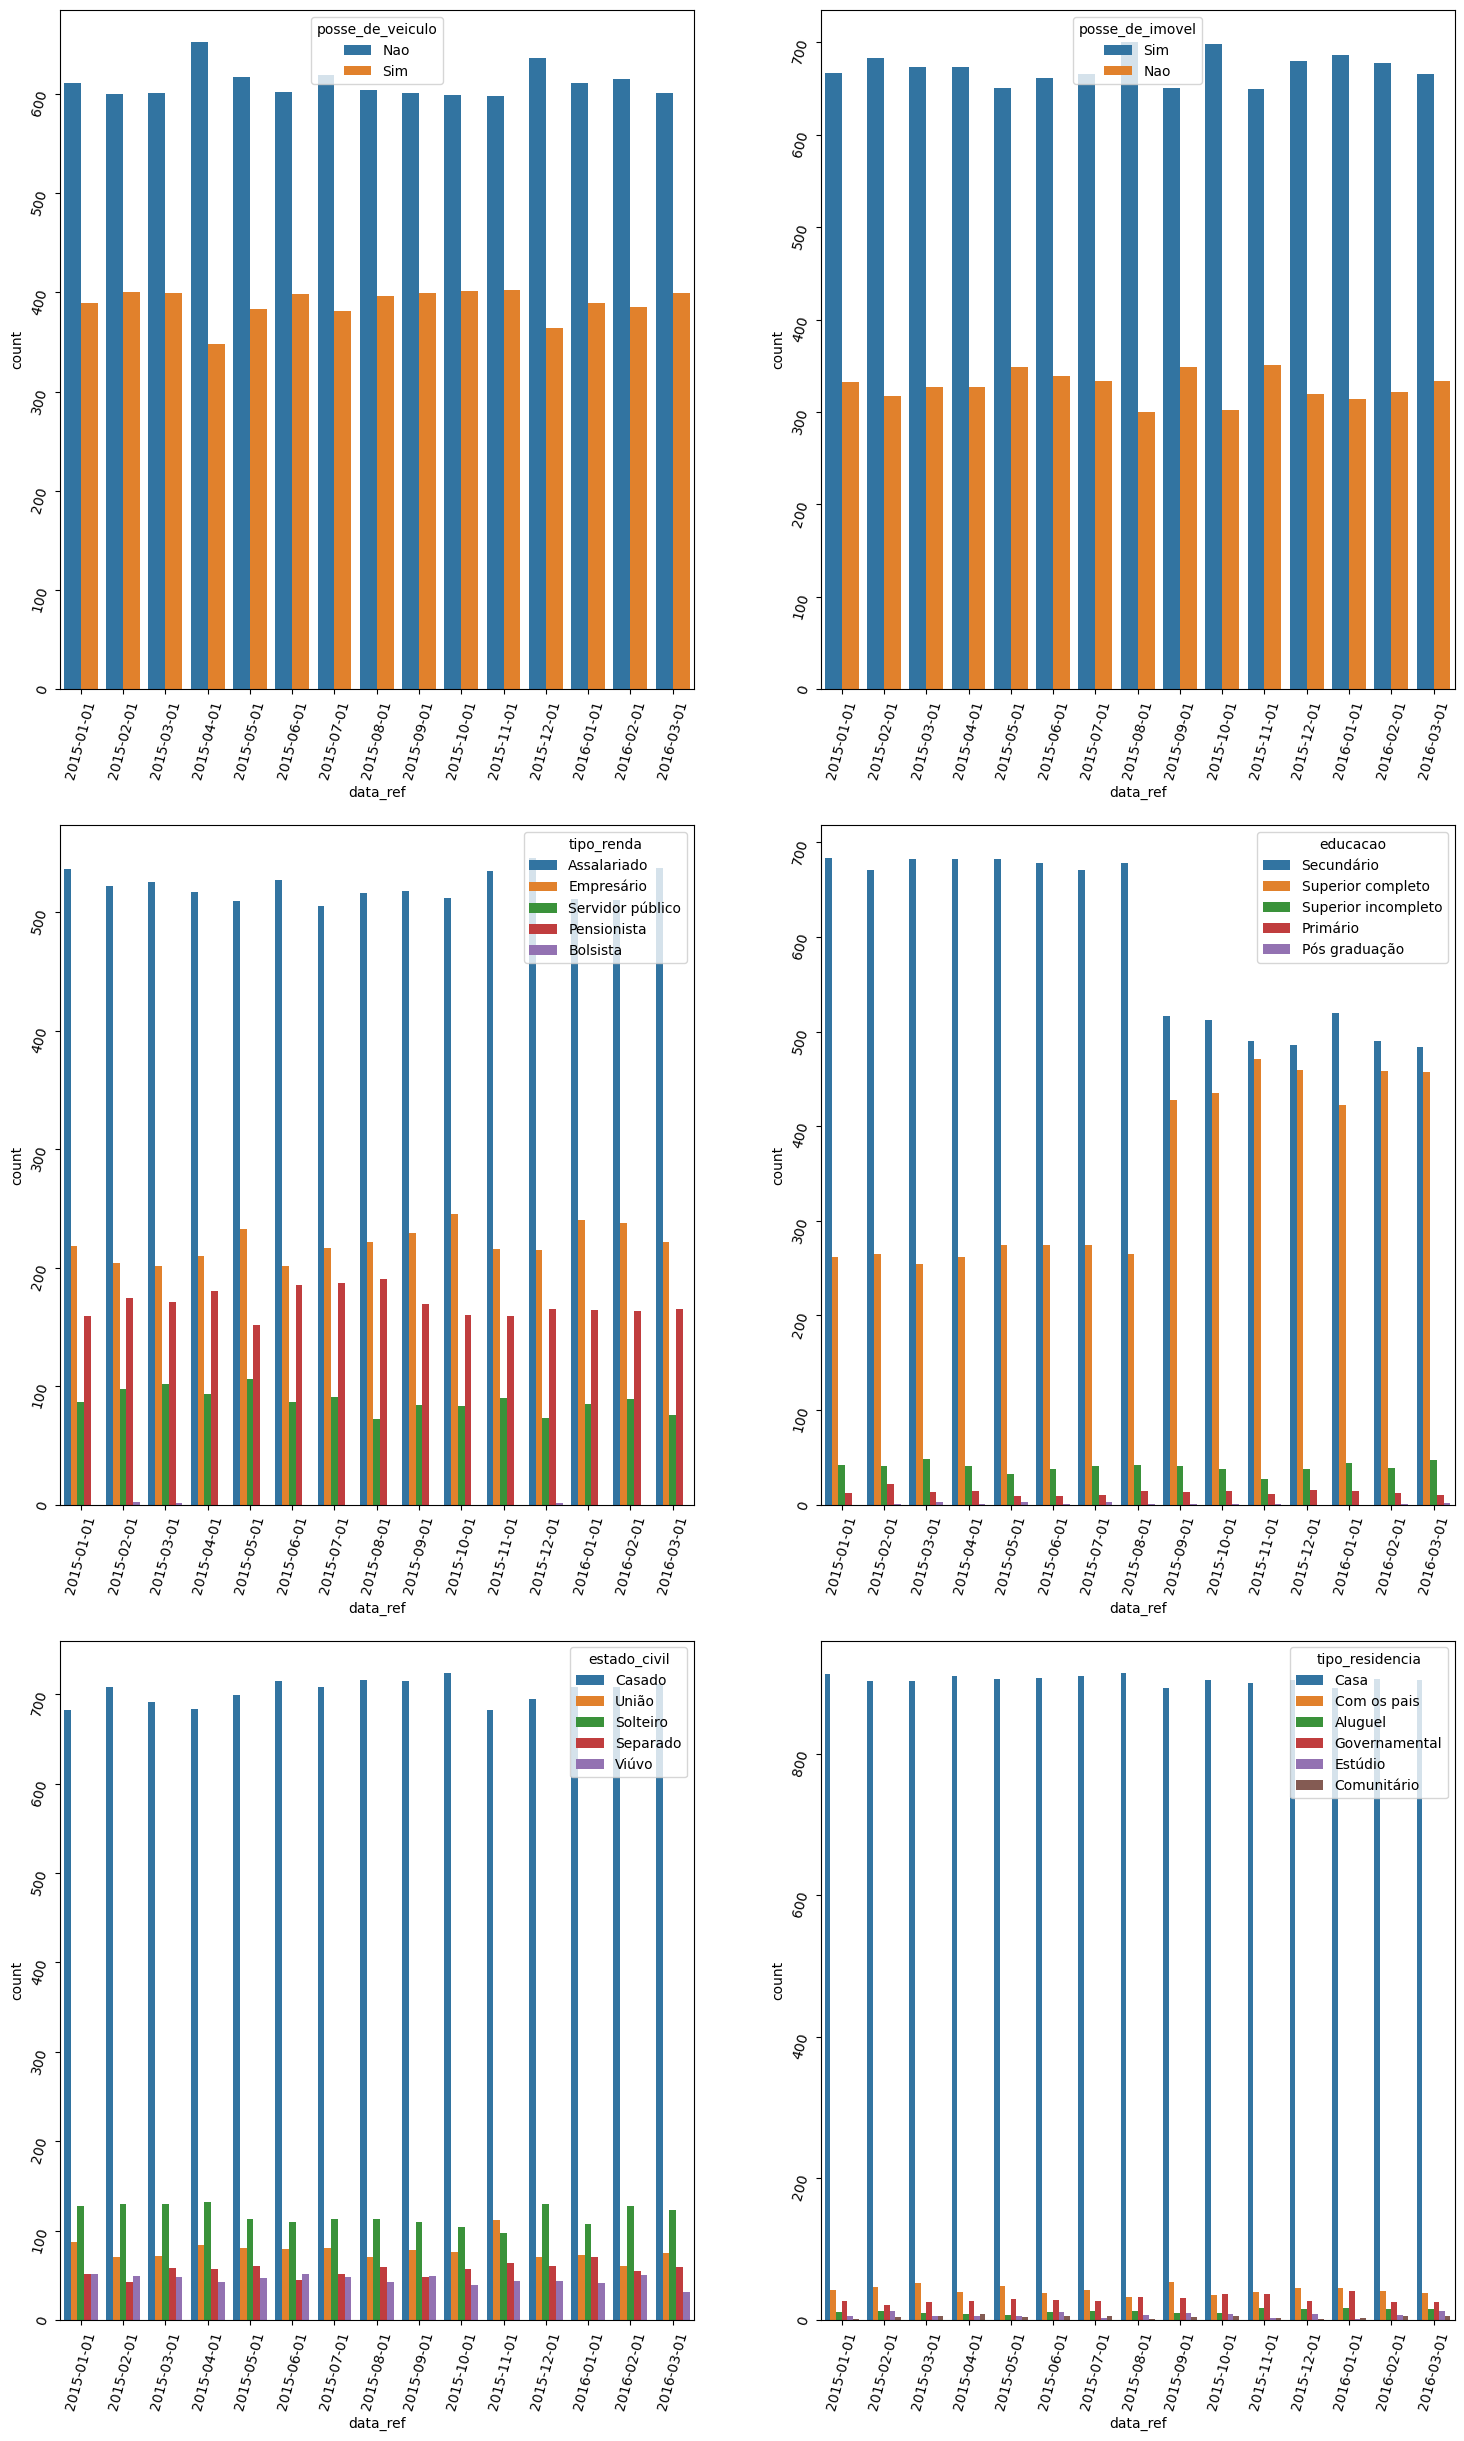

In [5]:
plt.close()
fig,axes = plt.subplots(3, 2, figsize=(18,30))

sns.countplot(ax=axes[0,0], data=pr, x='data_ref', hue='posse_de_veiculo')
sns.countplot(ax=axes[0,1], data=pr, x='data_ref', hue='posse_de_imovel')
sns.countplot(ax=axes[1,0], data=pr, x='data_ref', hue='tipo_renda')
sns.countplot(ax=axes[1,1], data=pr, x='data_ref', hue='educacao')
sns.countplot(ax=axes[2,0], data=pr, x='data_ref', hue='estado_civil')
sns.countplot(ax=axes[2,1], data=pr, x='data_ref', hue='tipo_residencia')

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(75)
    for label in ax.get_yticklabels():
        label.set_rotation(75)

plt.show()

In [6]:
# na variavel educacao teve uma alteraçao importante, a quantidade de pessoas com nivel superior aumentou
# significativamente ao longo do tempo

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

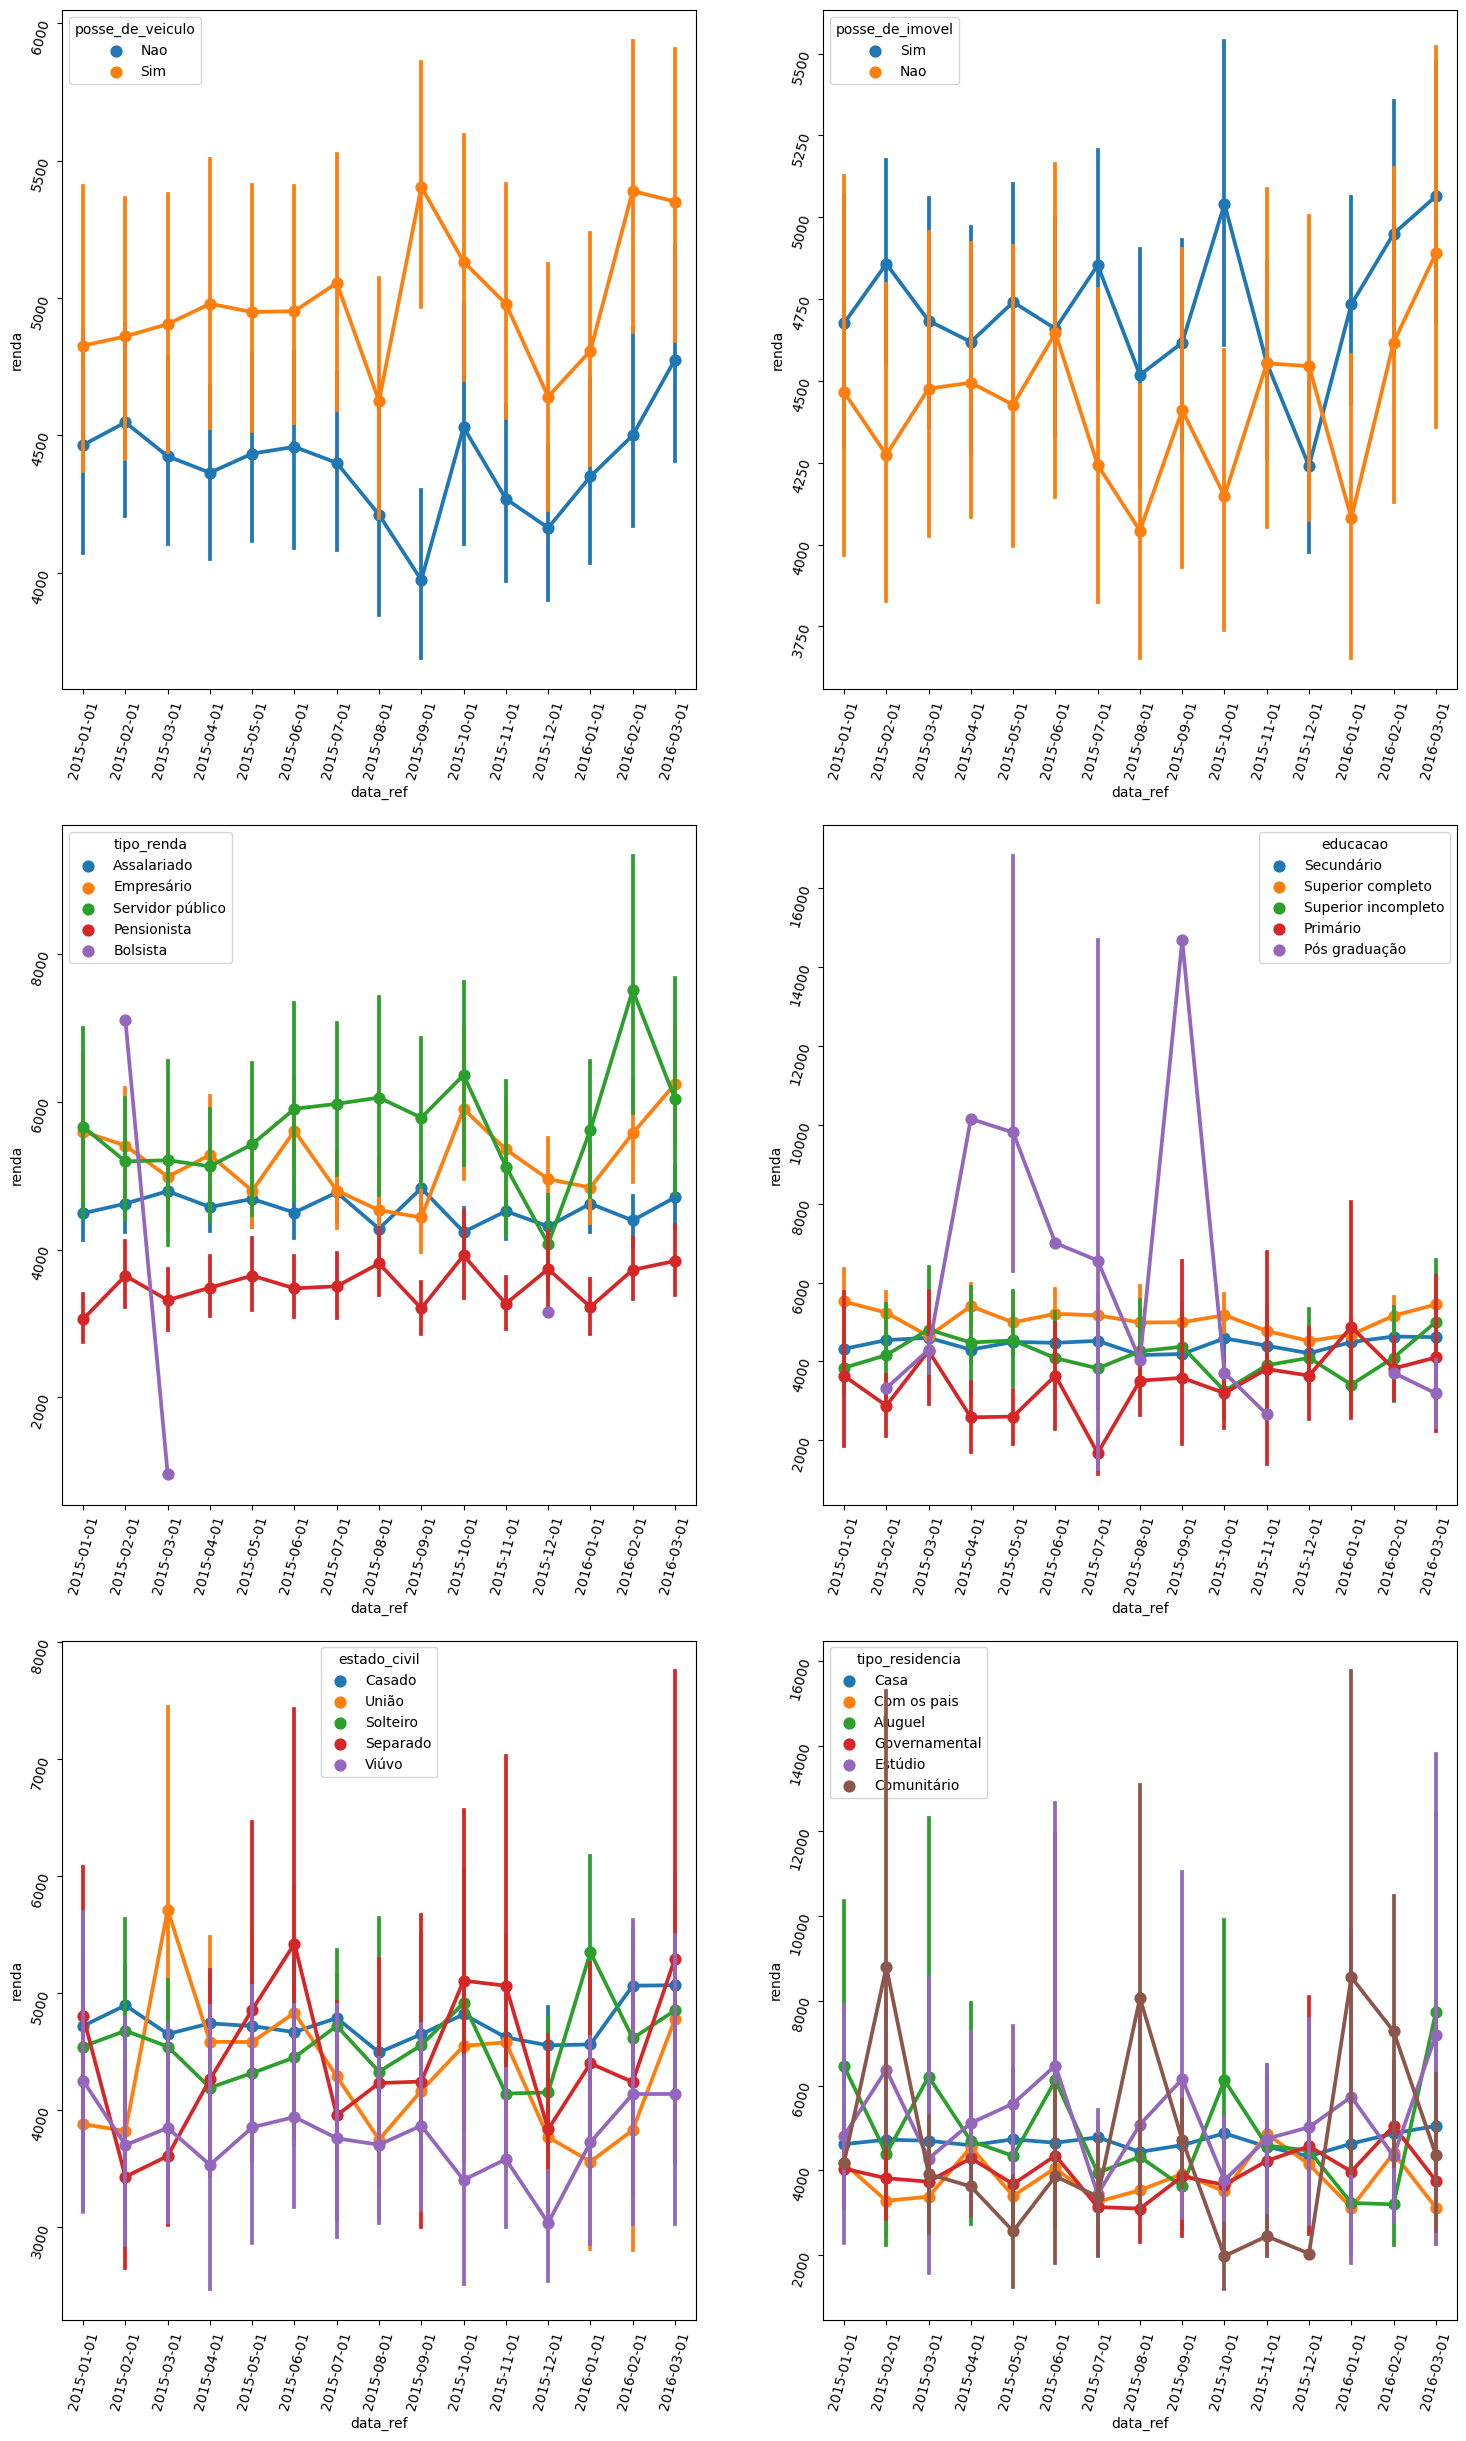

In [7]:
plt.close()
fig,axes = plt.subplots(3, 2, figsize=(18,30))

sns.pointplot(ax=axes[0,0], data=pr, x='data_ref', y='renda', hue='posse_de_veiculo', errorbar=('ci', 95))
sns.pointplot(ax=axes[0,1], data=pr, x='data_ref', y='renda', hue='posse_de_imovel', errorbar=('ci', 95))
sns.pointplot(ax=axes[1,0], data=pr, x='data_ref', y='renda', hue='tipo_renda', errorbar=('ci', 95))
sns.pointplot(ax=axes[1,1], data=pr, x='data_ref', y='renda', hue='educacao', errorbar=('ci', 95))
sns.pointplot(ax=axes[2,0], data=pr, x='data_ref', y='renda', hue='estado_civil', errorbar=('ci', 95))
sns.pointplot(ax=axes[2,1], data=pr, x='data_ref', y='renda', hue='tipo_residencia', errorbar=('ci', 95))

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(75)
    for label in ax.get_yticklabels():
        label.set_rotation(75)

plt.show()

In [8]:
# No geral da pra perceber uma estabilidade nos dados, com alguns picos que podem ser investigados
# e talvez tratados com as tecnicas de limpeza e preparaçao dos dados.